<a href="https://colab.research.google.com/github/l3ft-debug/finance-economics-analysis/blob/main/finance_econ_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial & Economic Data Beginner Project

Welcome to this beginner-friendly project! In this notebook, we'll explore a real-world financial and economic dataset.

We'll cover:
- Loading and cleaning the data
- Exploratory Data Analysis (EDA)
- Simple data visualizations
- Feature correlation
- Predicting stock closing prices using a basic linear regression model

**Dataset:** finance_economics_dataset.csv

Let's get started!

In [1]:
# Install required libraries if not already installed
!pip install pandas matplotlib seaborn scikit-learn --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 1. Load the Dataset

> **Note:** Upload the `finance_economics_dataset.csv` file using the code cell below.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving finance_economics_dataset.csv to finance_economics_dataset.csv


In [4]:
# Load the CSV file
df = pd.read_csv('finance_economics_dataset.csv')
df.head()

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


## 2. Data Cleaning

In [5]:
# Check info & missing values
print(df.info())
print('\nMissing values per column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [6]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert numerical columns
num_cols = df.columns.drop(['Date', 'Stock Index'])
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with too many NaNs (optional, for simplicity)
df = df.dropna(thresh=int(len(df.columns) / 2))  # drop rows with more than half NaNs

# Fill remaining NaNs with column mean
df = df.fillna(df.mean(numeric_only=True))

## 3. Exploratory Data Analysis (EDA)

In [7]:
# Summary statistics
df.describe()

,Date,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),Interest Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
count,3000,3000.000000,3000.000000,3000.000000,3000.00000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2004-02-08 11:59:59.999999872,2982.094607,2981.249173,3018.887777,2944.32975,5.033864e+08,2.608903,5.096830,8.663787,5.218237,...,1.146113,115.115233,85.539953,1655.167877,300.554457,5099.546667,5.007413,24.598667,49.955197,7551.278000
min,2000-01-01 00:00:00,1000.050000,954.520000,1012.130000,917.17000,1.636024e+06,-5.000000,0.010000,2.000000,0.500000,...,0.800000,80.010000,20.040000,800.160000,100.130000,107.000000,0.010000,0.000000,0.100000,101.000000
25%,2002-01-19 18:00:00,1994.982500,1997.425000,2035.952500,1955.39750,2.545224e+08,-1.012500,2.607500,5.450000,2.890000,...,0.980000,98.267500,52.590000,1226.737500,202.370000,2503.750000,2.570000,12.000000,25.762500,3950.750000
50%,2004-02-08 12:00:00,2970.780000,2977.180000,3006.520000,2939.24500,5.033710e+08,2.725000,5.110000,8.710000,5.250000,...,1.140000,114.795000,85.080000,1666.060000,299.885000,5123.500000,5.060000,25.000000,49.840000,7610.000000
75%,2006-02-27 06:00:00,3974.690000,3982.082500,4015.217500,3934.08750,7.537963e+08,6.242500,7.600000,11.882500,7.492500,...,1.320000,132.455000,119.150000,2080.730000,399.137500,7616.250000,7.482500,37.000000,74.825000,11148.750000
max,2008-03-18 00:00:00,4998.230000,5034.130000,5076.190000,4977.06000,9.999771e+08,10.000000,10.000000,15.000000,10.000000,...,1.500000,149.960000,149.870000,2499.660000,499.920000,9998.000000,10.000000,49.000000,99.990000,14990.000000
std,NaN,1151.862689,1151.783841,1151.683485,1151.83490,2.859004e+08,4.287337,2.910513,3.737536,2.726115,...,0.201128,20.111351,37.847063,492.177706,114.601328,2898.714108,2.866466,14.301344,28.722592,4203.705678


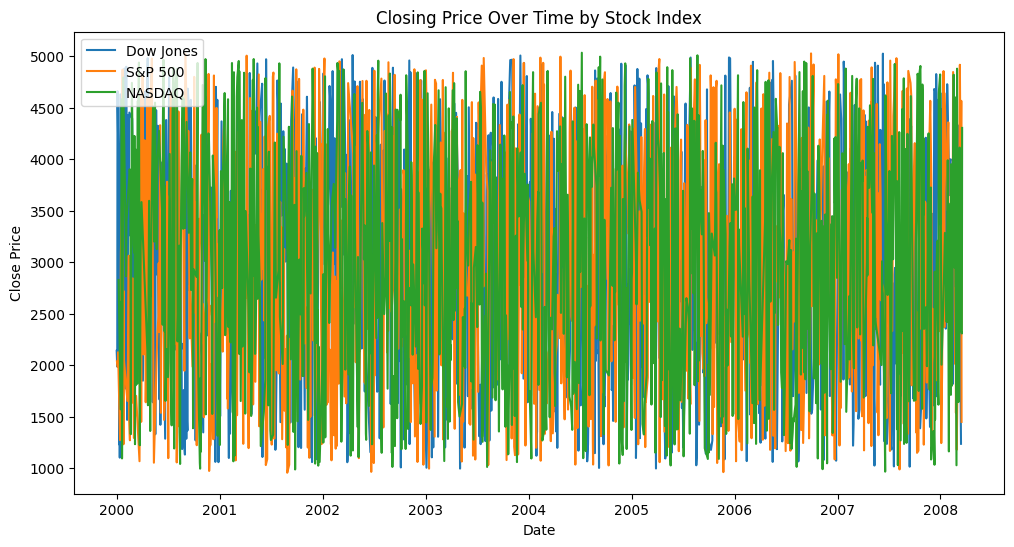

In [8]:
# Plot closing prices over time for each Stock Index
plt.figure(figsize=(12,6))
for idx in df['Stock Index'].unique():
    plt.plot(df.loc[df['Stock Index'] == idx, 'Date'],
             df.loc[df['Stock Index'] == idx, 'Close Price'], label=idx)
plt.title('Closing Price Over Time by Stock Index')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

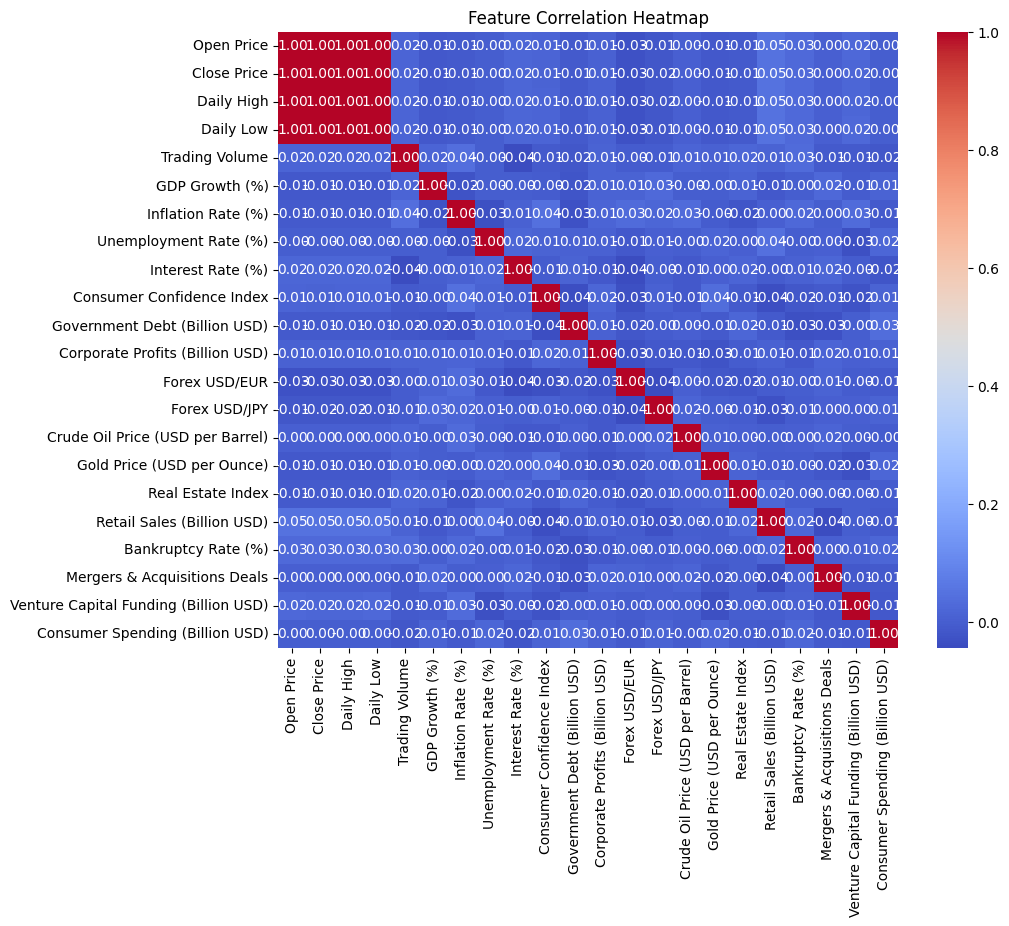

In [9]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 4. Simple Linear Regression: Predicting Closing Price

In [11]:
# Use all numeric features except 'Close Price' as X, and 'Close Price' as y
feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Close Price']
X = df[feature_cols]
y = df['Close Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Performance
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.2f}')

RMSE: 16.24
R2 Score: 1.00


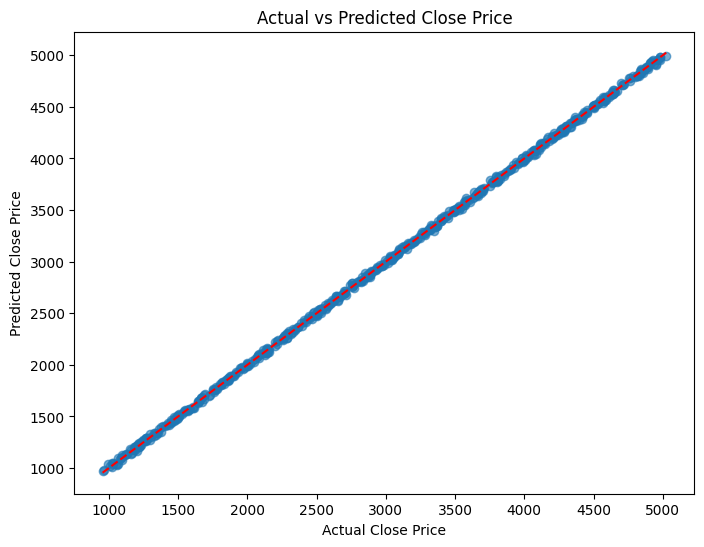

In [12]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Actual vs Predicted Close Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()